In [1]:
#I imported the necessary libaries for data analysis , cleaning and vissualization and model building
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import joblib
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error)



/home/zero/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#I read my csv file using encoding="latin1" to decode it
df = pd.read_csv('./dataset/laptop_price.csv', encoding="latin1")

In [3]:
# Displayed all columns in my  data set
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [4]:
#Converted all columns names to lower case for easy cleaning and future processing
df.columns = df.columns.str.lower()
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [5]:
#displayed the first 10 samples of my dataset
df.head(10)

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [6]:
#displayed the tail 10 samples of my dataset
df.tail(10)

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
1293,1311,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00
1294,1312,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99
1295,1313,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99
1296,1314,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00


In [7]:
#Displayed 25 random samples from my dataset using a random state of 14 
df.sample(n=25, random_state=14)

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
606,613,Toshiba,Tecra Z50-C-144,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1399.00
495,502,Lenovo,Thinkpad X260,Ultrabook,12.5,IPS Panel 1366x768,Intel Core i5 6200U 2.3GHz,8GB,180GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1099.00
1075,1090,Lenovo,IdeaPad 300-17ISK,Notebook,17.3,1600x900,Intel Core i5 6200U 2.3GHz,8GB,1.0TB HDD,AMD Radeon R5 M330,Windows 10,3.0kg,659.00
893,904,Lenovo,ThinkPad T470s,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,1799.00
946,960,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,Windows 10,1.36kg,1472.20
1231,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg,3499.00
1122,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg,1513.00
1063,1077,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32kg,989.99
273,278,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.36kg,2499.00
708,716,Lenovo,Thinkpad T460p,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,1191.00


In [8]:
#Checked the overall info of my data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_id         1303 non-null   int64  
 1   company           1303 non-null   object 
 2   product           1303 non-null   object 
 3   typename          1303 non-null   object 
 4   inches            1303 non-null   float64
 5   screenresolution  1303 non-null   object 
 6   cpu               1303 non-null   object 
 7   ram               1303 non-null   object 
 8   memory            1303 non-null   object 
 9   gpu               1303 non-null   object 
 10  opsys             1303 non-null   object 
 11  weight            1303 non-null   object 
 12  price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
#Checked for missing values in my dataset, no missing values exist
df.isnull().sum()

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

In [10]:
#described numeric columns
df.describe()

,laptop_id,inches,price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [11]:
#described categorical columns
df.describe(include="object")

,company,product,typename,screenresolution,cpu,ram,memory,gpu,opsys,weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


In [12]:
# Remove 'GB' from RAM and convert to integer
df['ram'] = df['ram'].str.replace("GB","").astype(int)

# Remove 'kg' from Weight and convert to float
df['weight'] = df['weight'].str.replace("kg","").astype(float)

# Clean up 'Memory' column (split HDD/SSD/etc.)
df['memory'] = df['memory'].str.replace("GB","").str.replace("TB","000")
df['memory'] = df['memory'].str.replace(r'\D', '', regex=True).replace('', '0').astype(int)

# Convert Inches to float
df['inches'] = df['inches'].astype(float)

In [13]:
# Detect outliers in Price_euros using IQR
Q1 = df["price_euros"].quantile(0.25)
Q3 = df["price_euros"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["price_euros"] < lower_bound) | (df["price_euros"] > upper_bound)]

print("Price Outliers Count:", outliers.shape[0])
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print("Min Price in Data:", df['price_euros'].min())
print("Max Price in Data:", df['price_euros'].max())

Price Outliers Count: 29
Lower Bound: -734.32
Upper Bound: 2821.20
Min Price in Data: 174.0
Max Price in Data: 6099.0


In [14]:
#Converting categorical features to numerical features for machine learning
categorical_cols = ['company','product','typename','cpu','gpu','opsys','screenresolution']
encoders = {}

# Apply label encoding
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Save the encoders dictionary
joblib.dump(encoders, "label_encoders.pkl")
df.head()
#My chosen enccoding strategy is Label encoding which assigns a unique integer to each categorical feature and makes it suitable for machine learniing

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,1,300,4,13.3,23,65,8,128,58,8,1.37,1339.69
1,2,1,301,4,13.3,1,63,8,128,51,8,1.34,898.94
2,3,7,50,3,15.6,8,74,8,256,53,4,1.86,575.00
3,4,1,300,4,15.4,25,85,16,512,9,8,1.83,2537.45
4,5,1,300,4,13.3,23,67,8,256,59,8,1.37,1803.60


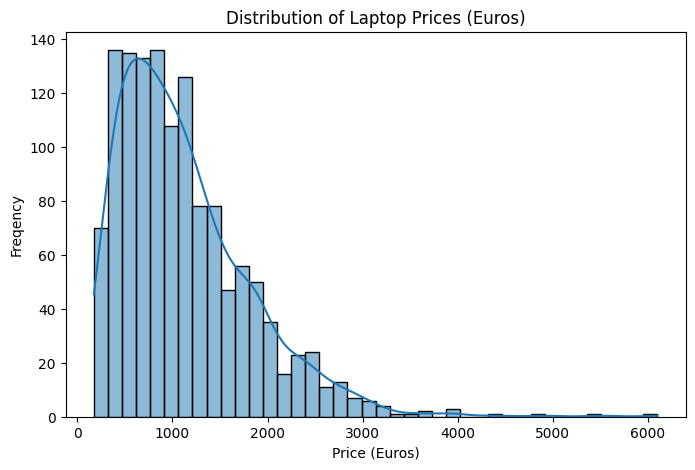

In [15]:
# 1. Distribution of Price
plt.figure(figsize=(8,5))
sns.histplot(df['price_euros'], bins=40, kde=True)
plt.title("Distribution of Laptop Prices (Euros)")
plt.xlabel("Price (Euros)")
plt.ylabel("Freqency")
plt.show()



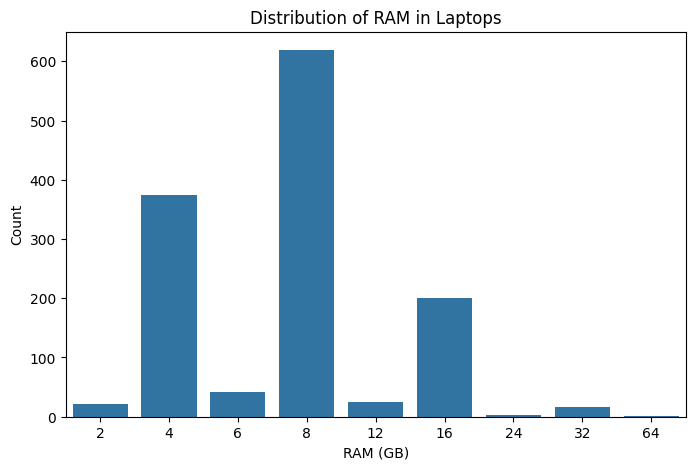

In [16]:
# 2. Distribution of RAM
plt.figure(figsize=(8,5))
sns.countplot(x='ram', data=df)
plt.title("Distribution of RAM in Laptops")
plt.xlabel("RAM (GB)")
plt.ylabel("Count")
plt.show()

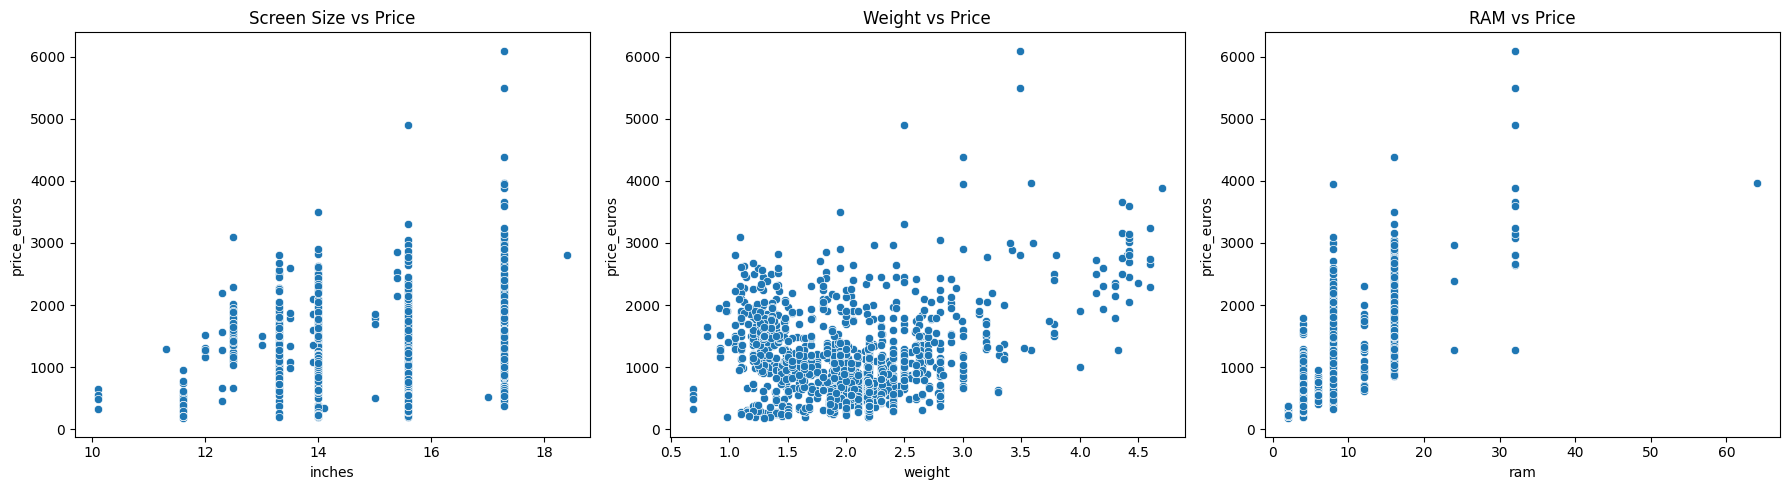

In [17]:
# 3. Scatterplots with Price
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.scatterplot(ax=axes[0], x="inches", y="price_euros", data=df)
axes[0].set_title("Screen Size vs Price")

sns.scatterplot(ax=axes[1], x="weight", y="price_euros", data=df)
axes[1].set_title("Weight vs Price")

sns.scatterplot(ax=axes[2], x="ram", y="price_euros", data=df)
axes[2].set_title("RAM vs Price")

plt.tight_layout()
plt.show()

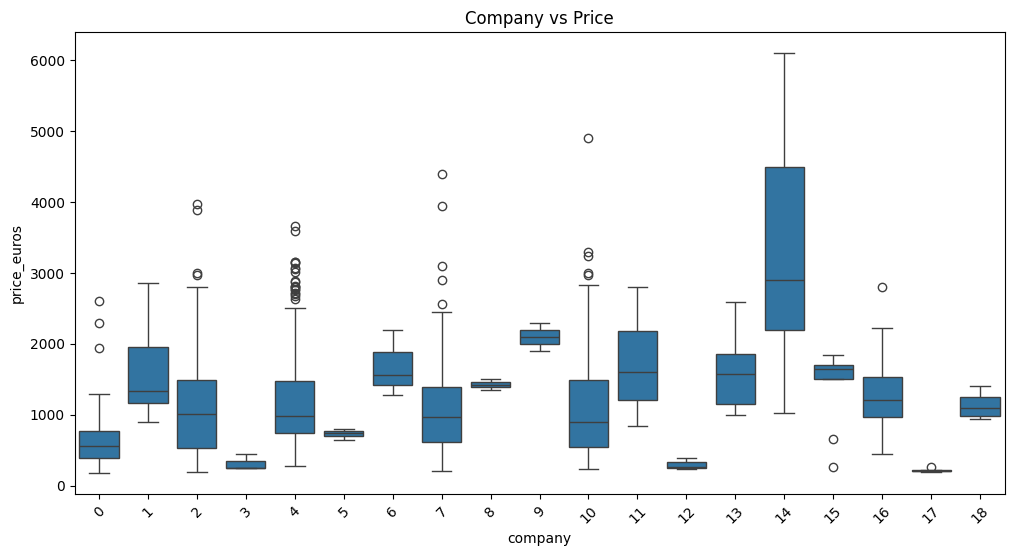

In [18]:
# 4. Boxplots: Categorical Features vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x="company", y="price_euros", data=df)
plt.title("Company vs Price")
plt.xticks(rotation=45)
plt.show()

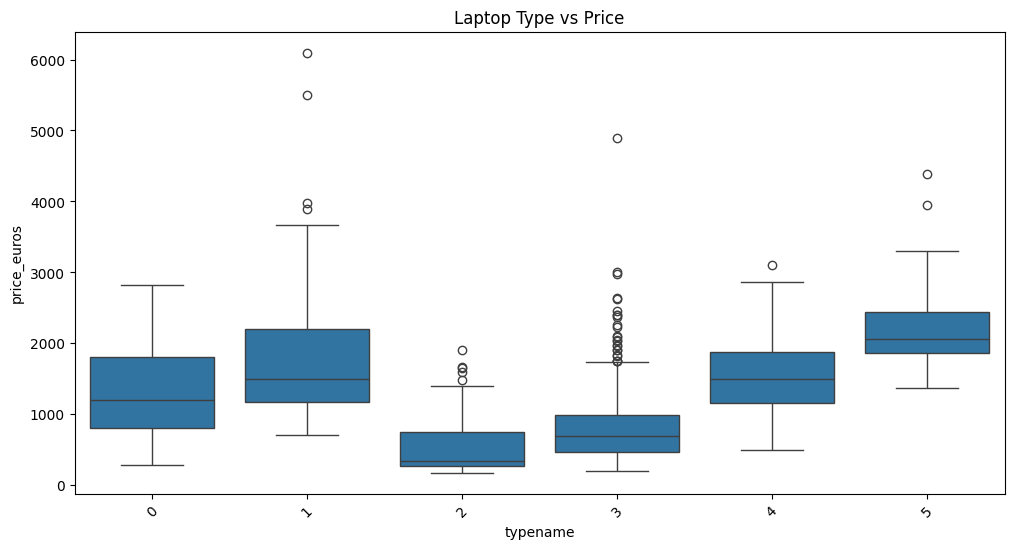

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x="typename", y="price_euros", data=df)
plt.title("Laptop Type vs Price")
plt.xticks(rotation=45)
plt.show()

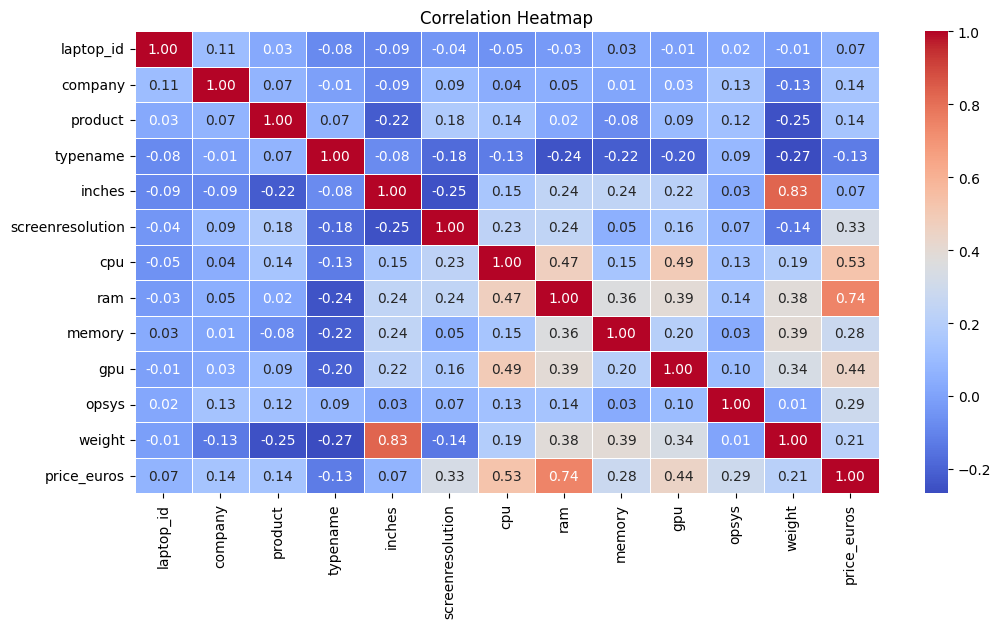

In [20]:
# 5. Correlation Heatmap
plt.figure(figsize=(12,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [21]:
#From this EDA, the most influential factors affecting laptop prices are:

#RAM Higher RAM is strongly associated with higher prices. (strongest driver of price)

#Company/Brand (premium brands command higher prices)

#Laptop Type (typename) (gaming/workstations cost more)

#Screen Size (inches) and Weight (secondary influence)

In [22]:
#  Feature Engineering
# 1. Price per Inch (how much the laptop costs per screen size)
df['price_per_inch'] = df['price_euros'] / df['inches']

# 2. Memory per GB of RAM (captures balance between storage and memory)
df['memory_per_ram'] = df['memory'] / df['ram']

# 3. High-End Laptop Flag (binary feature: expensive premium laptops)
df['is_high_end'] = (df['price_euros'] > df['price_euros'].median()).astype(int)

# Preview new dataset
df.head()


,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,price_per_inch,memory_per_ram,is_high_end
0,1,1,300,4,13.3,23,65,8,128,58,8,1.37,1339.69,100.728571,16.0,1
1,2,1,301,4,13.3,1,63,8,128,51,8,1.34,898.94,67.589474,16.0,0
2,3,7,50,3,15.6,8,74,8,256,53,4,1.86,575.00,36.858974,32.0,0
3,4,1,300,4,15.4,25,85,16,512,9,8,1.83,2537.45,164.769481,32.0,1
4,5,1,300,4,13.3,23,67,8,256,59,8,1.37,1803.60,135.609023,32.0,1


In [23]:
# Justification of New Features

# 1. price_per_inch: 
    # Captures relative value for screen size.

    # Some brands charge more per inch for compact ultrabooks (e.g., MacBooks) improves model understanding of premium vs. budget devices.

# 2. memory_per_ram:
    # Storage (HDD/SSD) combined with RAM is a better measure of overall performance capacity.

    # Helps model differentiate laptops with the same RAM but very different storage speeds/sizes.

# 3. is_high_end:
    # Binary feature that segments laptops into budget vs. premium categories.

    # Makes the model more sensitive to nonlinear jumps in price at the premium range.


In [24]:
# #  Model Building

# Define features (X) and target (y)
X = df.drop(columns=['price_euros', 'price_per_inch', 'is_high_end'])   # all predictors
y = df['price_euros']                  # target variable

# Split dataset into Train  and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=14
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (977, 13)
Testing set shape: (326, 13)


In [25]:
# Initialize the model
lin_reg = LinearRegression()


In [26]:
# Train the model
lin_reg.fit(X_train, y_train)

# Display the model's coefficient and intercept​
print(f"Model Coefficient: {lin_reg.coef_}")
print(f"Model Intercept: {lin_reg.intercept_}")

Model Coefficient: [ 1.24409993e-01  8.83373423e+00  1.31270914e-01  4.10682485e+01
 -8.48229260e+01  9.52060417e+00  4.71290297e+00  7.54719596e+01
  7.10929398e-06  3.46749265e+00  1.01120784e+02  1.03243986e+02
  1.08379686e-04]
Model Intercept: 133.79494220578647


In [27]:
# Print coefficients (to see feature influence)
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lin_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Model trained successfully ")
coefficients


Model trained successfully 


,Feature,Coefficient
11,weight,103.243986
10,opsys,101.120784
7,ram,75.471960
3,typename,41.068249
5,screenresolution,9.520604
1,company,8.833734
6,cpu,4.712903
9,gpu,3.467493
2,product,0.131271
0,laptop_id,0.124410


In [28]:
# Make predictions on the training data​
y_train_pred = lin_reg.predict(X_train)
print(f"Predicted training data: {y_train_pred[:10]}")
print(f"\nActual training data: {(y_train[:10].values)}")

Predicted training data: [ 733.19227568 1156.62712052 1091.32097263 1756.43279073 1825.55720341
  538.94320978  520.31313992 1494.26040272 1130.26470969 1915.78804545]

Actual training data: [ 540.   1124.    742.   2241.5  1799.    403.5   369.   2041.    949.
 2537.45]


In [29]:
# Make predictions on the test data​
y_pred = lin_reg.predict(X_test)
print(f"Predicted training data: {y_pred[:10]}")
print(f"\nActual training data: {(y_test[:10].values)}")

Predicted training data: [1272.31953555 1265.8933024   871.5468374  1293.92494813 1233.59502302
 2022.86840229 1305.95730057 1725.29820591 1947.88126184 1174.69300105]

Actual training data: [1399.   1099.    659.   1799.   1472.2  3499.   1513.    989.99 2499.
 1191.  ]


In [30]:
# #Model Evaluation


# Predictions on test set
y_pred = lin_reg.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")


Model Evaluation Results
Mean Absolute Error (MAE): 292.151
Mean Squared Error (MSE): 180371.291
Root Mean Squared Error (RMSE): 424.701
R-squared (R²): 0.669


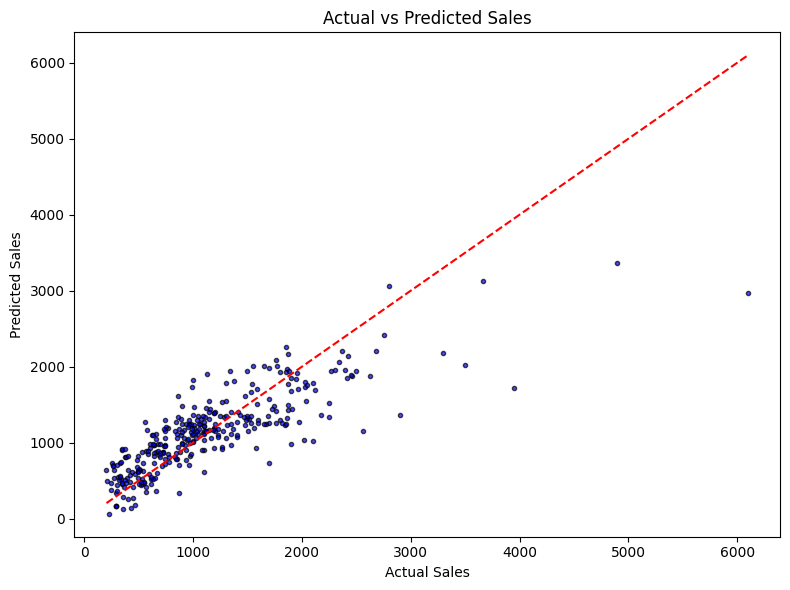

In [31]:
# Plot actual vs. predicted sales for training data​
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7,
s=9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()

In [32]:
# Load encoders
encoders = joblib.load("label_encoders.pkl")

# To decode a column, e.g., 'company'
df['company_original'] = encoders['company'].inverse_transform(df['company'])
df['product_original'] = encoders['product'].inverse_transform(df['product'])
df['typename_original'] = encoders['typename'].inverse_transform(df['typename'])
df['cpu_original'] = encoders['cpu'].inverse_transform(df['cpu'])
df['gpu_original'] = encoders['gpu'].inverse_transform(df['gpu'])
df['opsys_original'] = encoders['opsys'].inverse_transform(df['opsys'])
df['screenresolution_original'] = encoders['screenresolution'].inverse_transform(df['screenresolution'])

df.head(10)

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,...,price_per_inch,memory_per_ram,is_high_end,company_original,product_original,typename_original,cpu_original,gpu_original,opsys_original,screenresolution_original
0,1,1,300,4,13.3,23,65,8,128,58,...,100.728571,16.0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,macOS,IPS Panel Retina Display 2560x1600
1,2,1,301,4,13.3,1,63,8,128,51,...,67.589474,16.0,0,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,Intel HD Graphics 6000,macOS,1440x900
2,3,7,50,3,15.6,8,74,8,256,53,...,36.858974,32.0,0,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,No OS,Full HD 1920x1080
3,4,1,300,4,15.4,25,85,16,512,9,...,164.769481,32.0,1,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,AMD Radeon Pro 455,macOS,IPS Panel Retina Display 2880x1800
4,5,1,300,4,13.3,23,67,8,256,59,...,135.609023,32.0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,macOS,IPS Panel Retina Display 2560x1600
5,6,0,58,3,15.6,0,14,4,500,17,...,25.641026,125.0,0,Acer,Aspire 3,Notebook,AMD A9-Series 9420 3GHz,AMD Radeon R5,Windows 10,1366x768
6,7,1,300,4,15.4,25,84,16,256,60,...,138.959091,16.0,1,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.2GHz,Intel Iris Pro Graphics,Mac OS X,IPS Panel Retina Display 2880x1800
7,8,1,301,4,13.3,1,63,8,256,51,...,87.120301,32.0,1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,Intel HD Graphics 6000,macOS,1440x900
8,9,2,608,4,14.0,8,106,16,512,98,...,106.785714,32.0,1,Asus,ZenBook UX430UN,Ultrabook,Intel Core i7 8550U 1.8GHz,Nvidia GeForce MX150,Windows 10,Full HD 1920x1080
9,10,0,430,4,14.0,15,83,8,256,61,...,55.000000,32.0,0,Acer,Swift 3,Ultrabook,Intel Core i5 8250U 1.6GHz,Intel UHD Graphics 620,Windows 10,IPS Panel Full HD 1920x1080


In [33]:
# Save model
joblib.dump(lin_reg, "laptop_price_model.pkl")

# Save columns used for prediction (important for correct input order later)
joblib.dump(X_train.columns.tolist(), "model_columns.pkl")


['model_columns.pkl']